In [8]:
import numpy as np
import scipy.io as sio
import matplotlib.pylab as plt
import scipy.optimize as op
import math

# =========== Part 1: Loading and Visualizing Data =============

In [3]:
print('Loading and Visualizing Data ...')

data = sio.loadmat('ex3/ex3data1.mat'); # training data stored in arrays X, y


Loading and Visualizing Data ...


In [4]:
X = data['X']
y = data['y'][:, 0]

m = np.size(X, 0)
# Randomly select 100 data points to display
rand_indices = np.random.permutation(m)
sel = X[rand_indices[0:100], :]

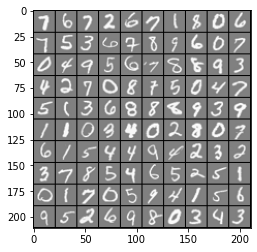

In [5]:
def displayData(X):
    width = round(math.sqrt(np.size(X, 1)))
    m, n = np.shape(X)
    height = int(n / width)
    
    drows = math.floor(math.sqrt(m))
    dcols = math.floor(m / drows)
    
    pad = 1
    darray = -1 * np.ones((pad+drows*(height+pad), pad+dcols*(width+pad)))
    
    curr_ex = 0
    for j in range(drows):
        for i in range(dcols):
            if curr_ex >= m:
                break
            max_val = np.max(np.abs(X[curr_ex, :]))
            darray[pad+j*(height+pad):pad+j*(height+pad)+height, pad+i*(width+pad):pad+i*(width+pad)+width]\
                = X[curr_ex, :].reshape((height, width))/max_val
            curr_ex += 1
        if curr_ex >= m:
            break
    
    plt.imshow(darray.T, cmap='gray')
    plt.show()
displayData(sel);

# ============ Part 2a: Vectorize Logistic Regression ============

In [9]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

def lrCostFunc(theta, x, y, lam):
    m = np.size(y, 0)
    h = sigmoid(x.dot(theta))
    j = -1/m*(y.dot(np.log(h))+(1-y).dot(np.log(1-h)))+lamb*(theta[1:].dot(theta[1:]))/(2*m)
    return j

def lrGradFunc(theta, x, y, lam):
    m = np.size(y, 0)
    h = sigmoid(x.dot(theta))
    grad = np.zeros(np.size(theta))
    grad[0] = 1 / m * (x[:, 0].dot(h-y))
    grad[1:] = 1/m*(x[:, 1:].T.dot(h-y))+lam/m*theta[1:]
    return grad

def oneVsAll(x, y, num_labels, lam):
    m, n = np.shape(x)
    all_theta = np.zeros((num_labels, n+1))

    x = np.concatenate((np.ones((m, 1)), x), axis=1)
    for i in range(num_labels):
        num = 10 if i == 0 else i
        init_theta = np.zeros((n+1,))
        result = op.minimize(lrCostFunc, init_theta, method='BFGS'\
                 ,jac=lrGradFunc, args=(x, 1*(y == num), lam), options={'maxiter': 50})
        all_theta[i, :] = result.x
    return all_theta

lamb = 0.1
num_labels = 10
all_theta = oneVsAll(X, y, num_labels, lamb)

# ================ Part 3: Predict for One-Vs-All ================

In [13]:
def predictOneVsAll(all_theta, x):
    m = np.size(x, 0)
    x = np.concatenate((np.ones((m, 1)), x), axis=1)
    p = np.argmax(x.dot(all_theta.T), axis=1)
    return p

pred = predictOneVsAll(all_theta, X)
print('Training Set Accuracy: ', np.sum(pred == (y % 10))/np.size(y, 0))

Training Set Accuracy:  0.9324
